In [1]:
import pandas as pd
import ast
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('netflix_dataset.csv')
data

,Index,Title,Type,Genres,User_id,Runtime_Count,Last_Watch_Timestamp
0,1,Five Came Back: The Reference Films,SHOW,['documentation'],3748,48,2/6/2025 22:46
1,2,Taxi Driver,MOVIE,"['crime', 'drama']",14658,113,9/21/2023 2:21
2,3,Monty Python and the Holy Grail,MOVIE,"['comedy', 'fantasy']",7064,91,12/15/2024 14:43
3,4,Life of Brian,MOVIE,['comedy'],3739,94,5/27/2024 21:26
4,5,The Exorcist,MOVIE,['horror'],48933,133,7/14/2024 12:30
...,...,...,...,...,...,...,...
1995,1996,The Perfection,MOVIE,"['thriller', 'drama', 'horror', 'music']",40557,90,10/20/2023 7:32
1996,1997,The Discovery,MOVIE,"['thriller', 'drama', 'romance', 'scifi']",22995,102,12/27/2024 16:04
1997,1998,MEGALOBOX,SHOW,"['action', 'animation', 'drama', 'scifi', 'spo...",971263,24,10/29/2024 15:15
1998,1999,The Kindergarten Teacher,MOVIE,"['drama', 'thriller', 'european']",74859,96,1/22/2025 14:00


In [3]:
data.head()

,Index,Title,Type,Genres,User_id,Runtime_Count,Last_Watch_Timestamp
0,1,Five Came Back: The Reference Films,SHOW,['documentation'],3748,48,2/6/2025 22:46
1,2,Taxi Driver,MOVIE,"['crime', 'drama']",14658,113,9/21/2023 2:21
2,3,Monty Python and the Holy Grail,MOVIE,"['comedy', 'fantasy']",7064,91,12/15/2024 14:43
3,4,Life of Brian,MOVIE,['comedy'],3739,94,5/27/2024 21:26
4,5,The Exorcist,MOVIE,['horror'],48933,133,7/14/2024 12:30


In [4]:
data.tail()

,Index,Title,Type,Genres,User_id,Runtime_Count,Last_Watch_Timestamp
1995,1996,The Perfection,MOVIE,"['thriller', 'drama', 'horror', 'music']",40557,90,10/20/2023 7:32
1996,1997,The Discovery,MOVIE,"['thriller', 'drama', 'romance', 'scifi']",22995,102,12/27/2024 16:04
1997,1998,MEGALOBOX,SHOW,"['action', 'animation', 'drama', 'scifi', 'spo...",971263,24,10/29/2024 15:15
1998,1999,The Kindergarten Teacher,MOVIE,"['drama', 'thriller', 'european']",74859,96,1/22/2025 14:00
1999,2000,Action,MOVIE,"['thriller', 'crime', 'action']",971360,82,9/22/2024 21:48


In [5]:
# converting Genres from string to list
data['Genres'] = data['Genres'].apply(ast.literal_eval)

In [6]:

all_genres = [genre for sublist in data['Genres'] for genre in sublist]
genre_counts = Counter(all_genres)

In [7]:
top_genres = genre_counts.most_common(10)
print("Top 10 Genres:")
for genre, count in top_genres:
    print(f"{genre}: {count}")

Top 10 Genres:
drama: 1137
comedy: 871
action: 480
thriller: 477
romance: 378
crime: 331
animation: 279
fantasy: 266
family: 262
scifi: 240


In [8]:
watch_hours_per_user = data.groupby('User_id')['Runtime_Count'].sum().reset_index()
watch_hours_per_user = watch_hours_per_user.sort_values(by='Runtime_Count', ascending=False)

In [9]:
print("Top 10 Users by Watch Hours:")
print(watch_hours_per_user.head(10))

Top 10 Users by Watch Hours:
      User_id  Runtime_Count
243     11475           1021
1069   173191            974
1070   173252            755
244     11476            641
240     11472            555
241     11473            522
242     11474            517
1143   223449            497
764     62784            438
13       1549            435


In [10]:
genre_watchtime = defaultdict(int)
for _, row in data.iterrows():
    for genre in row['Genres']:
        genre_watchtime[genre] += row['Runtime_Count']
genre_watch_df = pd.DataFrame(list(genre_watchtime.items()), columns=['Genre', 'Total_Watch_Hours'])
genre_lastwatch_df = pd.DataFrame(list(genre_watchtime.items()), columns=['Genre', 'Total_Watch_Hours'])

C:\Users\User\AppData\Local\Temp\ipykernel_12776\1502951382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Total_Watch_Hours', data=genre_watch_df, palette='viridis')


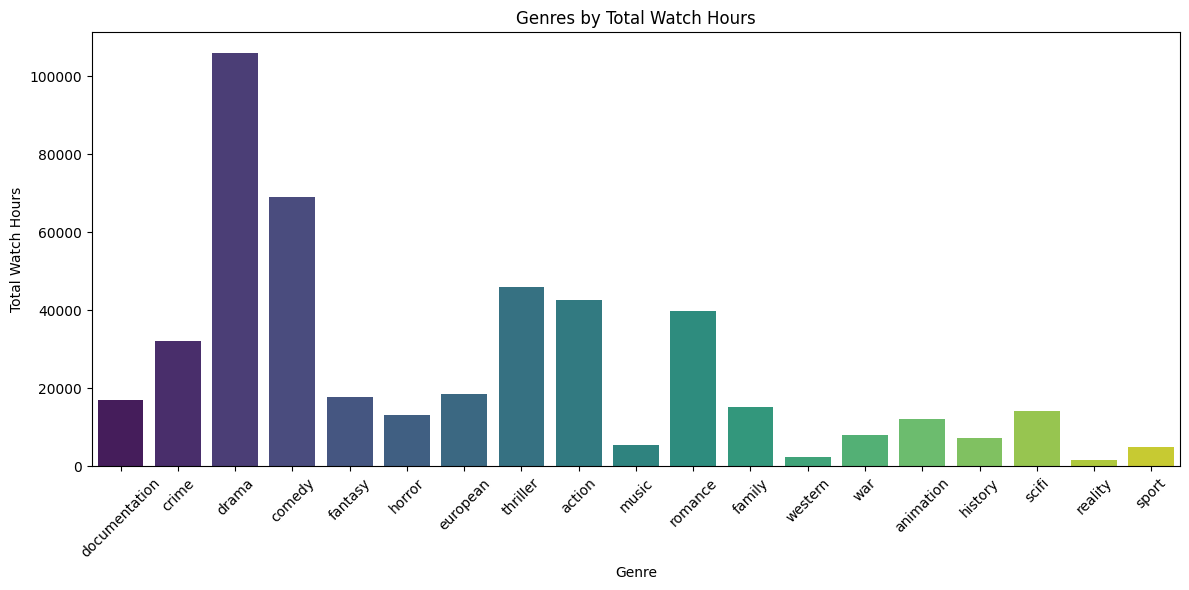

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Total_Watch_Hours', data=genre_watch_df, palette='viridis')
plt.title('Genres by Total Watch Hours')
plt.xlabel('Genre')
plt.ylabel('Total Watch Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
data['Last_Watch_Timestamp'] = pd.to_datetime(data['Last_Watch_Timestamp'], errors='coerce')
latest_watch_per_genre = defaultdict(lambda: pd.Timestamp.min)
for _, row in data.iterrows():
    for genre in row['Genres']:
        if pd.notnull(row['Last_Watch_Timestamp']):
            if row['Last_Watch_Timestamp'] > latest_watch_per_genre[genre]:
                latest_watch_per_genre[genre] = row['Last_Watch_Timestamp']
genre_last_watch_df = pd.DataFrame(list(latest_watch_per_genre.items()), columns=['Genre', 'Last_Watch_Timestamp'])
genre_last_watch_df = genre_last_watch_df.sort_values(by='Last_Watch_Timestamp', ascending=False)

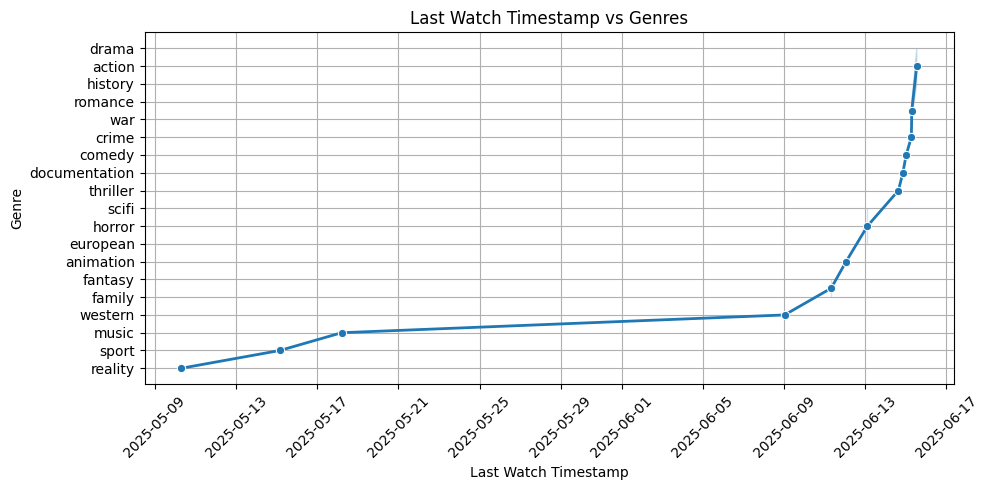

In [13]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Last_Watch_Timestamp', y='Genre', data=genre_last_watch_df, marker='o', linewidth=2)
plt.title('Last Watch Timestamp vs Genres')
plt.xlabel('Last Watch Timestamp')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
user_genre_pref = {}
for user_id, group in data.groupby('User_id'):
    genre_list = [genre for sublist in group['Genres'] for genre in sublist]
    top_genres = Counter(genre_list).most_common(3)
    user_genre_pref[user_id] = [g for g, _ in top_genres]
user_genres_df = pd.DataFrame(user_genre_pref.items(), columns=['User_id', 'Top_3_Genres'])

print("Top Genres per User:")
user_genres_df.head(10)

Top Genres per User:


,User_id,Top_3_Genres
0,176,"[horror, thriller, drama]"
1,192,"[scifi, drama, thriller]"
2,193,"[drama, comedy]"
3,201,[drama]
4,224,"[documentation, sport, crime]"
5,288,[comedy]
6,522,"[drama, comedy]"
7,913,"[comedy, horror]"
8,925,"[comedy, documentation]"
9,1005,"[comedy, family, scifi]"


In [15]:
binge_threshold = data['Runtime_Count'].quantile(0.75)
data['Is_Binge'] = data['Runtime_Count'] > binge_threshold

In [16]:
recent_df = data[data['Last_Watch_Timestamp'] > pd.Timestamp.now() - pd.Timedelta(days=30)]
recent_genres = [genre for sublist in recent_df['Genres'] for genre in sublist]
recent_trending_genres = Counter(recent_genres).most_common(5)

print("Recent Trending Genres (Last 30 Days):")
for genre, count in recent_trending_genres:
    print(f"{genre}: {count} watches")

Recent Trending Genres (Last 30 Days):
drama: 10 watches
comedy: 10 watches
action: 6 watches
romance: 5 watches
family: 5 watches


In [17]:
watch_hours_per_user = data.groupby('User_id')['Runtime_Count'].sum().reset_index()
watch_hours_per_user.columns = ['User_id', 'Total_Watch_Hours']

watch_hours_per_user['Segment'] = pd.cut(
    watch_hours_per_user['Total_Watch_Hours'],
    bins=[0, 200, 600, float('inf')],
    labels=['Casual', 'Regular', 'Heavy'])

print("User Watch Segments:")
watch_hours_per_user.head(10)

User Watch Segments:


,User_id,Total_Watch_Hours,Segment
0,176,144,Casual
1,192,43,Casual
2,193,45,Casual
3,201,44,Casual
4,224,231,Regular
5,288,27,Casual
6,522,123,Casual
7,913,91,Casual
8,925,74,Casual
9,1005,22,Casual


In [18]:
genre_watchtime = defaultdict(int)
for _, row in data.iterrows():
    for genre in row['Genres']:
        genre_watchtime[genre] += row['Runtime_Count']
genre_watch_df = pd.DataFrame(list(genre_watchtime.items()), columns=['Genre', 'Total_Watch_Hours'])
median_watch = genre_watch_df['Total_Watch_Hours'].median()
under_watched_genres = genre_watch_df[genre_watch_df['Total_Watch_Hours'] < median_watch]

print("Under-Watched Genres (Content Gap):")
print(under_watched_genres.sort_values(by='Total_Watch_Hours'))

Under-Watched Genres (Content Gap):
        Genre  Total_Watch_Hours
17    reality               1640
12    western               2312
18      sport               5082
9       music               5388
15    history               7249
13        war               8089
14  animation              12183
5      horror              13116
16      scifi              14202
